In [1]:
#Problem: 
#You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
#  •	If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
#  •	If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
#Objective:
#Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
#Constraints:
#When a person applies for a loan, there are two types of decisions that could be taken by the company:
#1.	Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
#  •	Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
#  •	Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
#  •	Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
#2.	Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)




In [2]:
# Import numpy , pandas , matplot and seaborn library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import warnings library to ignore warning messages
import warnings
warnings.filterwarnings ("ignore")
import datetime
pd.set_option("display.max.columns",300)
pd.set_option("display.max.rows",500)
import scipy

In [3]:
# Loading the data form loan.csv file 
# Dataframe
df=pd.read_csv("loan.csv")


# 1. Data Cleaning 

## 1.1 Verify the headers footer and summary details rows and delete it 

In [4]:
# summary of the Loan data 
# Verify the header rows in the dataframe
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# No of rows and column
df.shape

(39717, 111)

In [6]:
#verify the footer rows
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# no of rows and columns are 3917 & 111
df.shape

(39717, 111)

In [8]:
total_rows= len(df)
total_rows

39717

In [9]:
# Verify for the unnessacery rows of loan_status column 
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [10]:
# The loan status "current" is in progress hence the rows having currect value in loan_status column not required for the analysis and have to drop the rows
df=df[df['loan_status']!= 'Current']

#Print the total no of rows now
print('The total no of rows:', len(df))


The total no of rows: 38577


In [11]:
rows_deleted=((total_rows-len(df))*100)/total_rows
print('The percentage no of rows deleted:',round(rows_deleted,2))

The percentage no of rows deleted: 2.87


In [12]:
# Verify for the duplicate rows in the dataframe
duplicate_rows=len(df[df.duplicated()])
print('The count of duplicate rows:', round(duplicate_rows,2))


The count of duplicate rows: 0


## 1.2 Deleting the unnessacery column in the dataframe

In [13]:
#no of rows and column
df.shape

(38577, 111)

In [14]:
# Verify the null values or blank values in the columns
(df.isnull().sum()*100)/len(df)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.185033
emp_length                          2.677761
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.477901
purpose                             0.000000
title                               0.028514
zip_code  

In [15]:
# The no of columns we are going to drop as there are NA/blank values
na_columns= list(df.columns[df.isna().all()])
na_columns

['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [16]:
# no of column we are going to drop 
len(na_columns)

55

In [17]:
# drop the above 55 column from the dataframe, 56 columns should remain form 111
df= df.dropna(axis=1,how='all')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendin

In [18]:
#Delete the unique columns
unique_columns=[col for col in df.columns if df[col].nunique()==len(df)]
unique_columns

['id', 'member_id', 'url']

In [19]:
 #delete the url member id 
df.drop(['url','member_id'],axis=1, inplace= True)

In [20]:
df.shape

(38577, 54)

In [21]:
# Verify the column having text or description value and delete those column as these will not have any benefit in EDA
df.drop(columns=['desc','title'],inplace=True)
df.shape

(38577, 52)

In [22]:
#limit the analysis to group level only, deleting the subgroup  
df=df.drop(['sub_grade'],axis=1)

In [23]:
behavioural_cols=['delinq_2yrs','earliest_cr_line','last_pymnt_amnt','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','out_prncp'
                 ,'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                 'last_pymnt_d','last_credit_pull_d']
df=df.drop(behavioural_cols,axis=1)

In [24]:
df.shape

(38577, 33)

In [25]:
df.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp_inv                     1
pymnt_plan                        1
policy_code                       1
collections_12_mths_ex_med        1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
application_type                  1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                         

In [26]:
#delete the column having value 1
for column in df.columns:
    if df[column].nunique(dropna=True)== 1:
        print(column)
        df=df.drop(column,axis=1)
print('------')
df

pymnt_plan
initial_list_status
out_prncp_inv
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,9,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,4,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,10,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,37,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,40,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,9,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,20,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,26,NaN


In [27]:
# columns having null values
df.isna().mean().round(2)

id                        0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
emp_title                 0.06
emp_length                0.03
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
mths_since_last_delinq    0.65
mths_since_last_record    0.93
total_acc                 0.00
pub_rec_bankruptcies      0.02
dtype: float64

In [28]:
#drop the columns having more than 50% null values
column=['mths_since_last_delinq','mths_since_last_record']
df=df.drop(column,axis=1)
df.shape

(38577, 21)

In [29]:
# delete emp title as this is having text value
df=df.drop(['emp_title'],axis=1)

# 2 Data Conversion

In [30]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [31]:
df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [32]:
#convert term object to int 
def clean_term(term):
    return int(term.strip().split()[0])
    
df['term']=df['term'].apply(clean_term)
df['term'].dtype

dtype('int64')

In [33]:
df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [34]:
df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
11.11%    331
12.53%    327
10.74%    311
6.54%     305
6.91%     303
8.94%     294
16.77%    294
7.66%     292
13.61%    291
13.98%    284
13.23%    263
11.12%    259
15.99%    259
6.17%     252
12.68%    251
10.75%    250
10.36%    250
10.00%    249
11.36%    247
13.99%    241
11.83%    233
10.62%    228
10.38%    219
13.06%    219
10.25%    218
16.49%    218
14.96%    214
15.65%    208
18.25%    207
11.14%    206
6.92%     204
12.18%    203
15.23%    200
15.95%    199
14.65%    198
16.32%    198
8.00%     191
15.21%    187
12.73%    187
9.62%     186
15.27%    1

In [35]:
#convert int rate from string to float
df['int_rate']=df['int_rate'].str.strip('%').astype(float)

In [36]:
df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63     378
10.59    358
9.91     357
5.99     347
14.27    344
7.14     341
6.99     336
11.11    331
12.53    327
10.74    311
6.54     305
6.91     303
8.94     294
16.77    294
7.66     292
13.61    291
13.98    284
13.23    263
11.12    259
15.99    259
6.17     252
12.68    251
10.75    250
10.36    250
10.00    249
11.36    247
13.99    241
11.83    233
10.62    228
10.38    219
13.06    219
10.25    218
16.49    218
14.96    214
15.65    208
18.25    207
11.14    206
6.92     204
12.18    203
15.23    200
15.95    199
14.65    198
16.32    198
8.00     191
15.21    187
12.73    187
9.62     186
15.27    185
15.58    185
9.32     184
11.48    183
16.89    182
9.88     181
8.5

In [37]:
# convert the funded amount and loan amount from int to float
df=df.astype({'loan_amnt':'float','funded_amnt':'float'})
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,total_acc,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,9,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,4,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,10,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,37,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,40,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,9,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,20,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,26,NaN


In [38]:
#verify the grade data type
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [39]:
df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [40]:
# rounding off up to 2 decimal points
for c in ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','dti']:
    df[c]=df[c].apply(lambda x: round(x,2))
    print(df[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [41]:
# converting the issue_d to date 
df['issue_d']=pd.to_datetime(df.issue_d,format='%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [42]:
(df.isnull().sum()*100)/len(df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

# 3 Droping/Imputing the rows.

In [43]:
# droping the  null rows  for emp length and pub_rec_bankruptcies
prev_rows=len(df)
prev_rows

38577

In [44]:
df=df[df['emp_length'].notna()]
df=df[df['pub_rec_bankruptcies'].notna()]

In [45]:
final_rows=len(df)
deleted_rows=((prev_rows-final_rows)*100)/prev_rows
print("total % of rows deleted:",round(deleted_rows,2))
print(df.shape)

total % of rows deleted: 4.48
(36847, 20)


In [46]:
(df.isnull().sum()*100)/len(df)
# there is no NA now

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [47]:
# emp length
def emp_length(x):
    x=x.strip("years")
    x=x.strip("<")
    x=x.replace(" ","")
    x=x.replace("+","")
    return x 

df['emp_length']=df['emp_length'].apply(lambda x: emp_length(x))

In [48]:
df['emp_length']

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object

In [49]:
df.dtypes

id                               int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

# 4 Derived columns 

In [50]:
#Derived columns for issue month and issue year from issue date
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_month']=pd.DatetimeIndex(df['issue_d']).month

In [51]:
print(df.shape)
print(df['loan_amnt'].describe())


(36847, 22)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

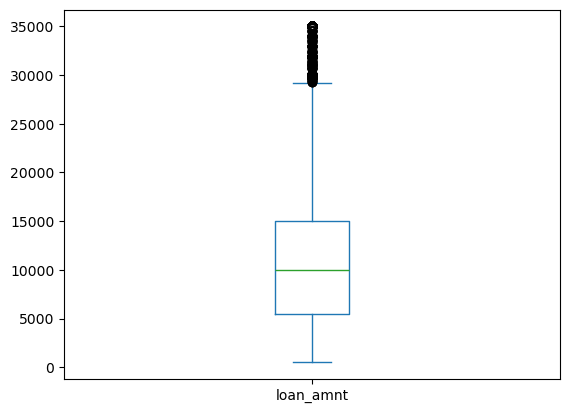

In [52]:
df['loan_amnt'].plot(kind='box')

# 5. Univraite Analysis

In [53]:
# Column metadata used by functions 
column_titles={
    'loan_amnt':'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv':'Funded Amount Investor',
    'term': 'term',
    'int_rate':'Interest Rate',
    'installment':'installment',
    'grade':'Grade',
    'emp_length':'Employment Length',
    'home_ownership':'Home Owner Status',
    'annual_inc':'Annual Income',
    'verification_status':'Verification Status',
    'issue_d':'Issue Date',
    'loan_status':'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state':'State',
    'dti':'Debt to Income Ratio',
    'pub_rec_bankruptcies':'Bankruptcies Record',
    'issue_y':'Issue Year',
    'issue_m':'Issue Month',
    'issue_q':'Issue Quarter',
    'loan_amnt_b':'Loan Amount Bins',
    'funded_amnt_inv_b':'Investor Funded Bins',
    'funded_amnt_b':'Funded Amount Bins',
    'annual_inc_b':'Annual Income Bins',
    'int_rate_b':'Intrest Rate Bins',
    'dti_b':'DTI Bins'
}

In [54]:
# Bucketing diffrent variables for better analysis


In [55]:
# bucketing loan amount 
def bucket_loan_amnt(column):
    if column<= 5000:
        return '0-5K' #25% quartile
    elif(column>5000) and (column<=10000):
        return '5K-10K' 
    elif(column>10000) and (column<=15000):
        return '10K-15K'
    else:
        return '15K - above' # 75% quartile

df['loan_amnt_b']=df.apply(lambda x: bucket_loan_amnt(x['loan_amnt']),axis=1)


In [56]:
#bucketing Annual Income
def bucket_annual_inc(column):
    if column<= 40000:
        return '0-40K' #25% quartile
    elif(column>40000) and (column<=50000):
        return '40K-50K' 
    elif(column>50000) and (column<=60000):
        return '50K-60K'
    elif(column>60000) and (column<=70000):
        return '60K-70K'
    elif(column>70000) and (column<=80000):
        return '70K-80K'
    else:
        return '80K - above' # 75% quartile

df['annual_inc_b']=df.apply(lambda x: bucket_annual_inc(x['annual_inc']),axis=1)


In [57]:
# bucketing Intrest Rate 
def bucket_int_rate(column):
    if column<= 9:
        return 'Very Low' #25% quartile
    elif(column>9) and (column<=11):
        return 'Low' 
    elif(column>11) and (column<=13):
        return 'Moderate'
    elif(column>13) and (column<=15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df['int_rate_b']=df.apply(lambda x: bucket_int_rate(x['int_rate']),axis=1)


In [58]:
# bucketing  dti 
def bucket_dti(column):
    if column<= 8:
        return 'Very Low' #25% quartile
    elif(column>8) and (column<=12):
        return 'Low' 
    elif(column>12) and (column<=16):
        return 'Moderate'
    elif(column>16) and (column<=20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df['dti_b']=df.apply(lambda x: bucket_dti(x.dti),axis=1)

In [59]:
# Univariate function
def plot_diagram(dtf,column):
    fig,p=plt.subplots(1,2, figsize=(16, 4))
    sns.displot(dtf.loc[dtf[column].notnull(),column], kde=True, stat="density", ax=p[0])
    sns.boxplot(x=column, data=dtf, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

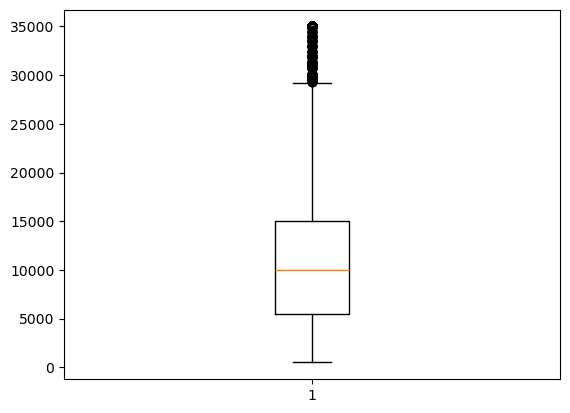

In [60]:
plt.boxplot(df['loan_amnt'],)
plt.show()

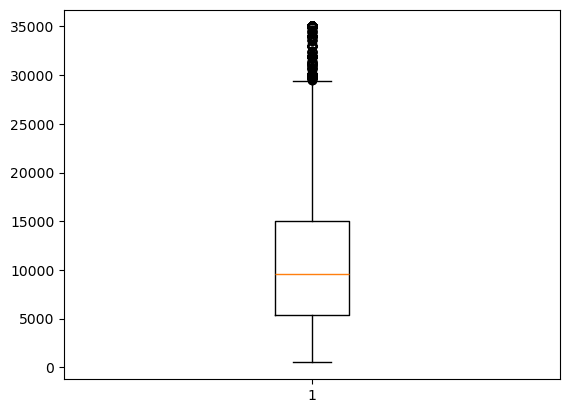

In [61]:
plt.boxplot(df['funded_amnt'],)
plt.show()

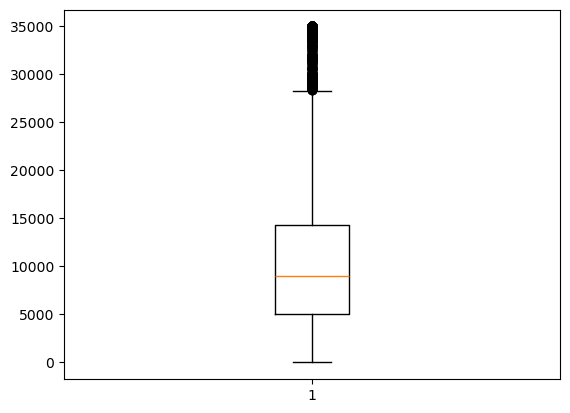

In [62]:
plt.boxplot(df['funded_amnt_inv'],)
plt.show()

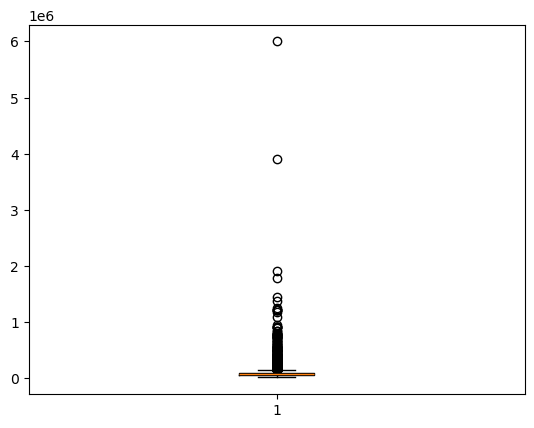

In [63]:
plt.boxplot(df['annual_inc'],)
plt.show()

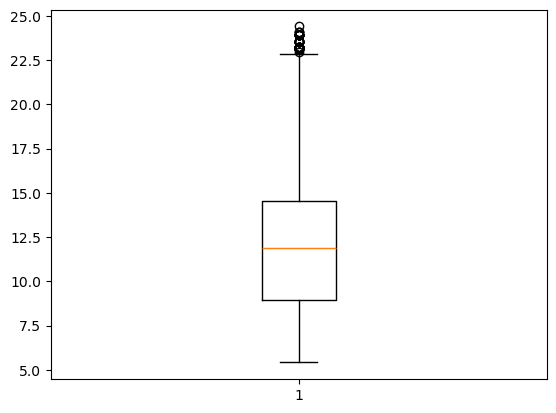

In [64]:
plt.boxplot(df['int_rate'],)
plt.show()

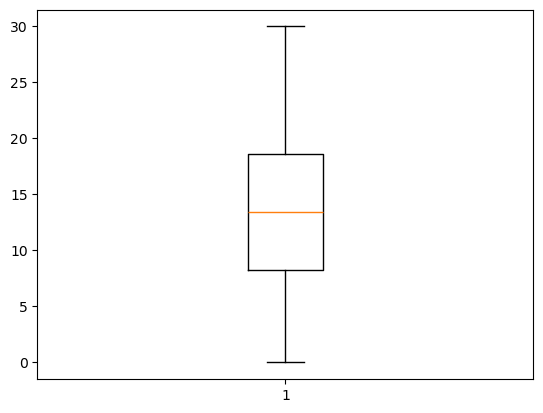

In [65]:
plt.boxplot(df['dti'],)
plt.show()

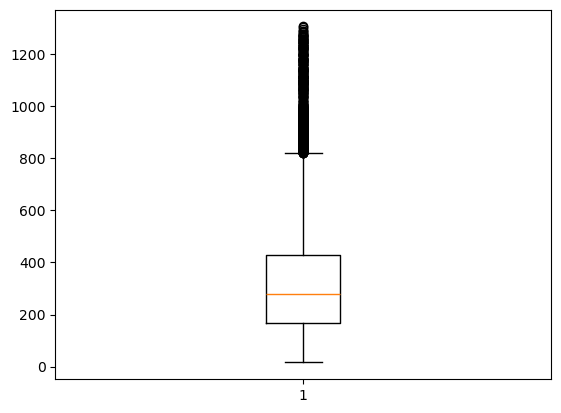

In [66]:
plt.boxplot(df['installment'],)
plt.show()

In [67]:
# from the above plot figures we need to remove the outliers
outlier_set1=['loan_amnt','funded_amnt','funded_amnt_inv']
outlier_set2=['int_rate','installment','annual_inc']

# delete the outliers based on IQR and define a function
def delete_outliers_iqr(data,columns,threshold):
    for col in columns:
        Q1= data[col].quantile(0.25)
        Q3= data[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1 - threshold*IQR
        upper_bound = Q3 + threshold*IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# eliminate outliers from the dataframe
df=delete_outliers_iqr(df,outlier_set1,1.5)
df=delete_outliers_iqr(df,outlier_set2,1.5)

    
    

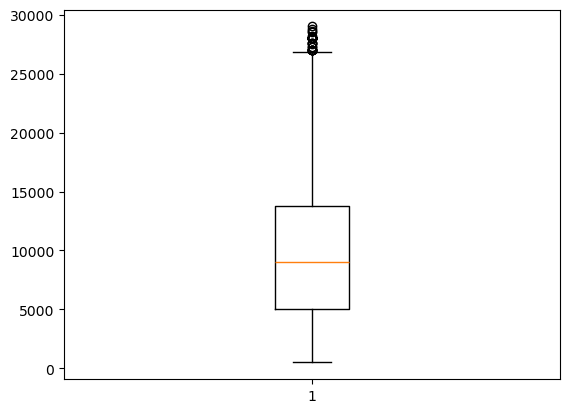

In [68]:
plt.boxplot(df['loan_amnt'],)
plt.show()

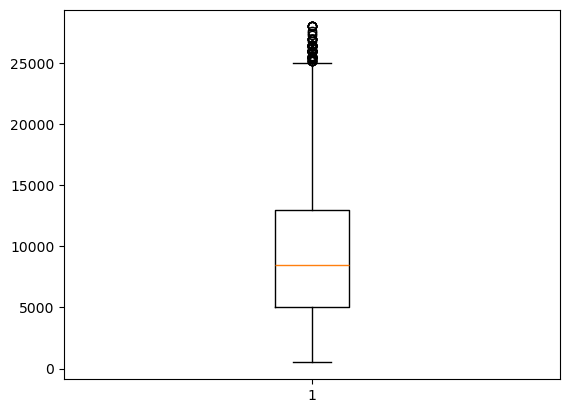

In [69]:
plt.boxplot(df['funded_amnt'],)
plt.show()

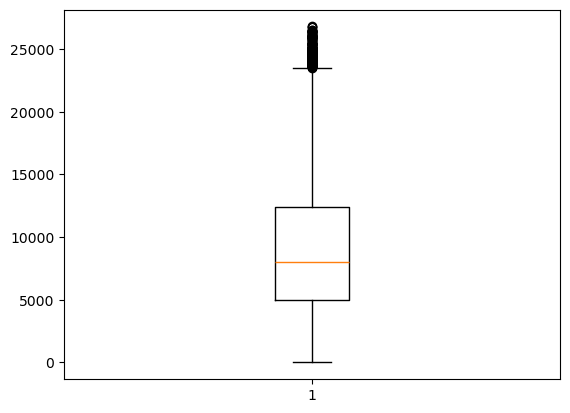

In [70]:
plt.boxplot(df['funded_amnt_inv'],)
plt.show()

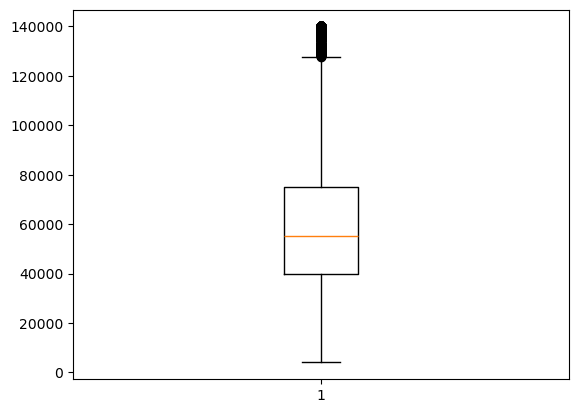

In [71]:
plt.boxplot(df['annual_inc'],)
plt.show()

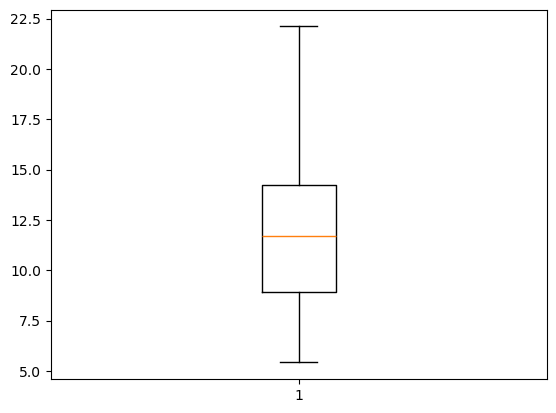

In [72]:
plt.boxplot(df['int_rate'],)
plt.show()

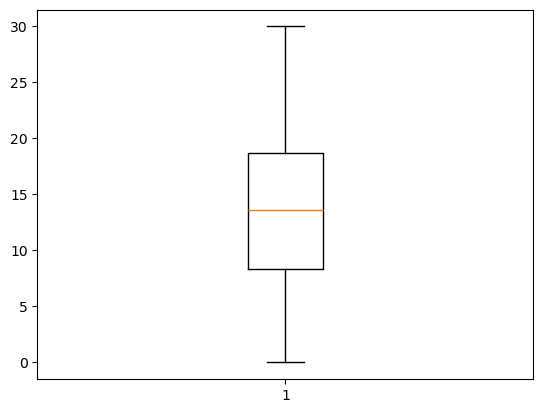

In [73]:
plt.boxplot(df['dti'],)
plt.show()

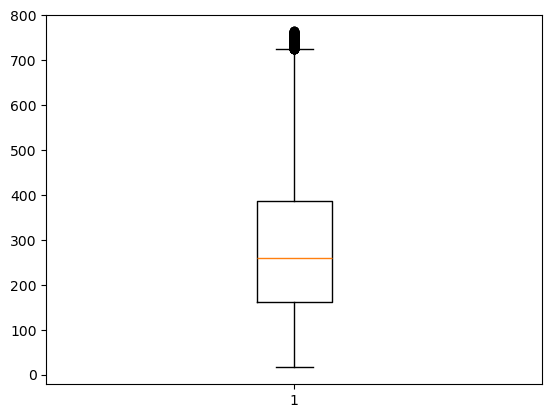

In [74]:
plt.boxplot(df['installment'],)
plt.show()

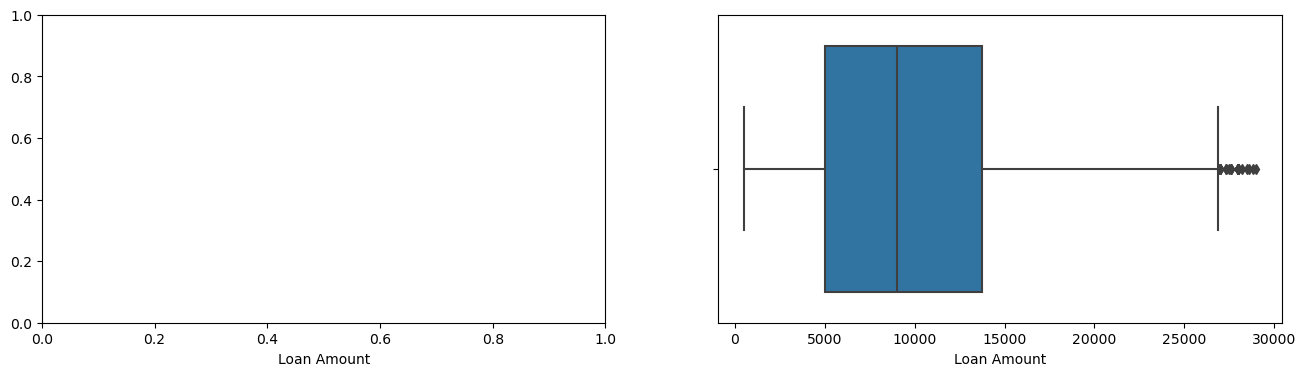

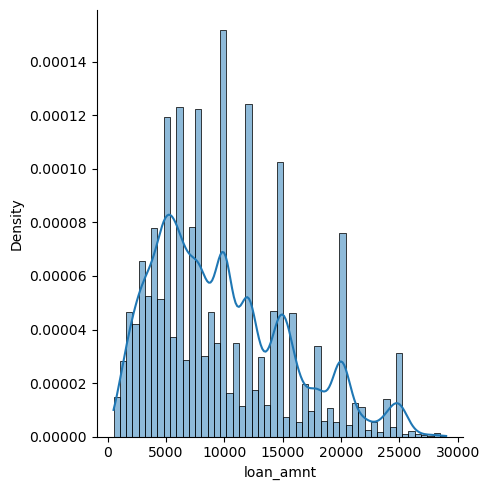

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [75]:
plot_diagram(df,'loan_amnt')
df['loan_amnt'].describe()

# Observation
## 1. Most of the loan amount was applied between 5k to 14k.
## 2. Max loan amount applied was ~27k

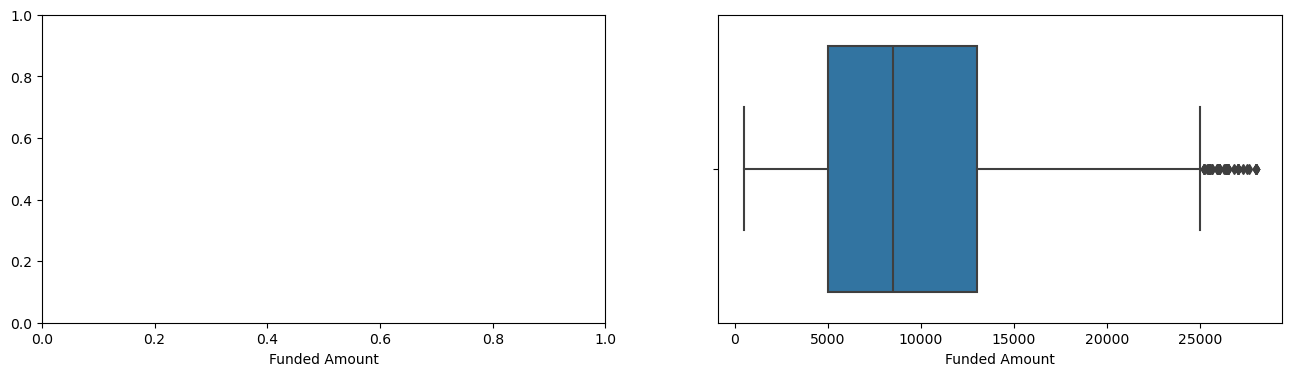

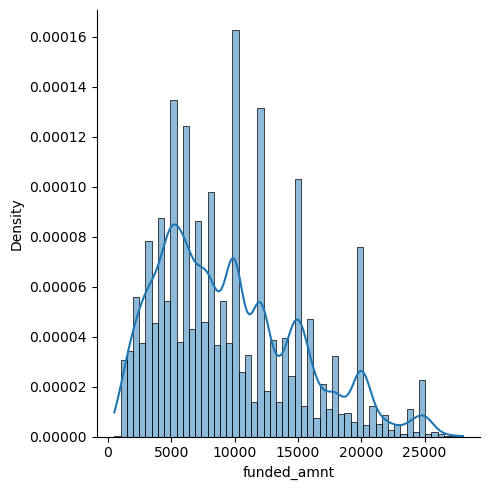

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [76]:
plot_diagram(df,'funded_amnt')
df['funded_amnt'].describe()

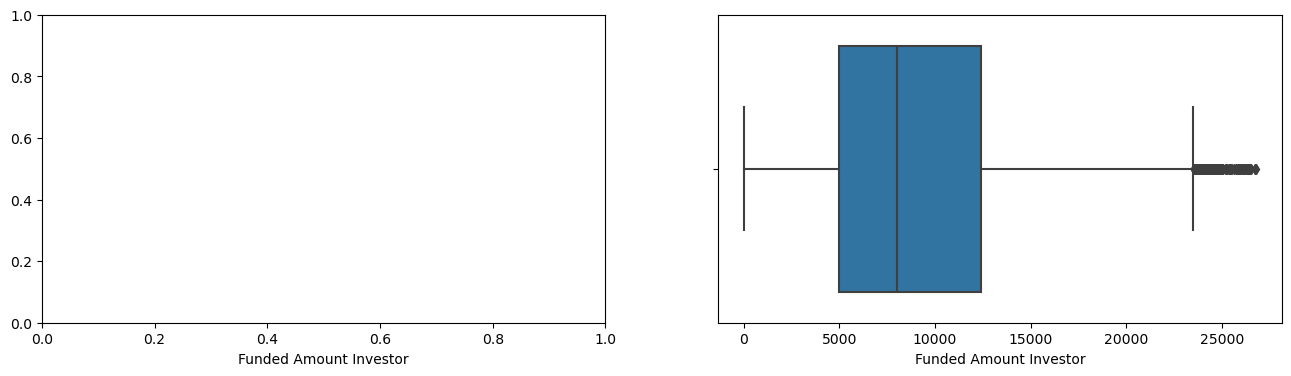

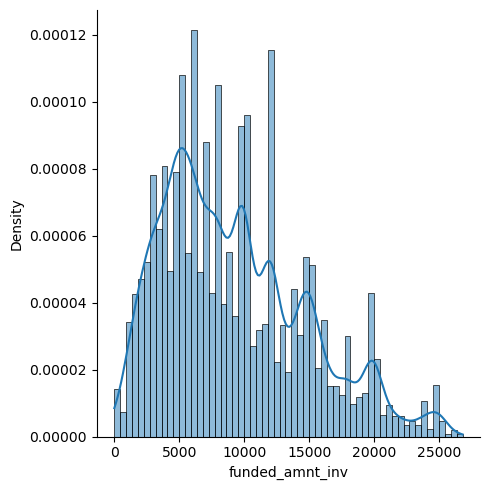

count    33191.000000
mean      9210.186390
std       5511.942478
min          0.000000
25%       5000.000000
50%       8000.000000
75%      12409.045000
max      26800.000000
Name: funded_amnt_inv, dtype: float64

In [77]:
plot_diagram(df,'funded_amnt_inv')
df['funded_amnt_inv'].describe()

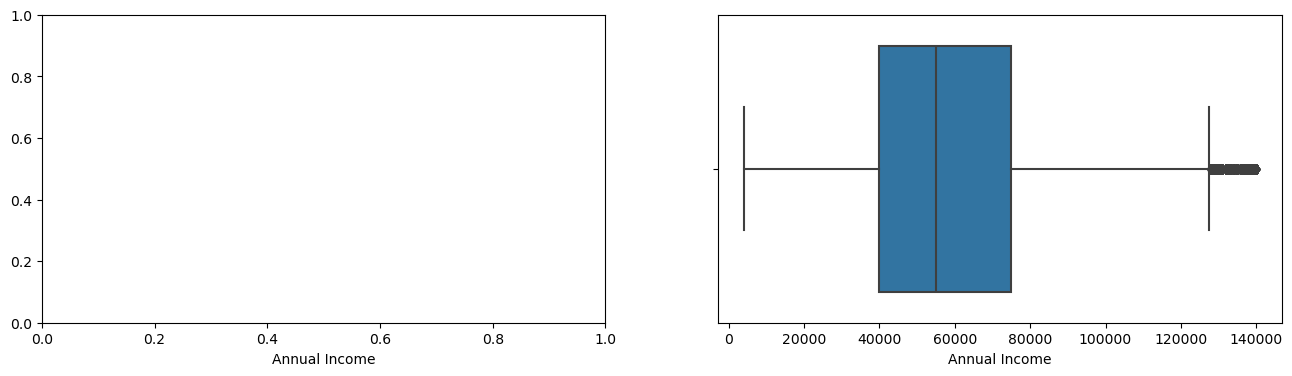

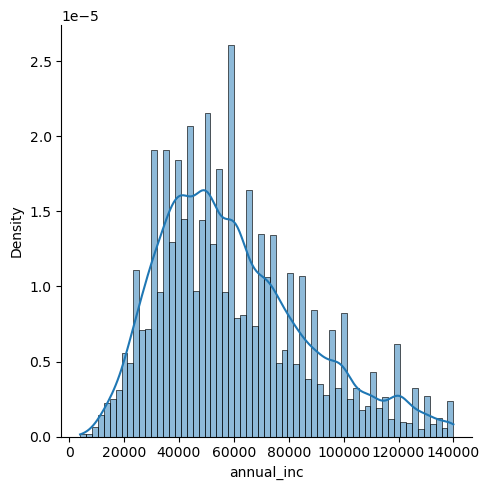

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [78]:
plot_diagram(df,'annual_inc')
df['annual_inc'].describe()

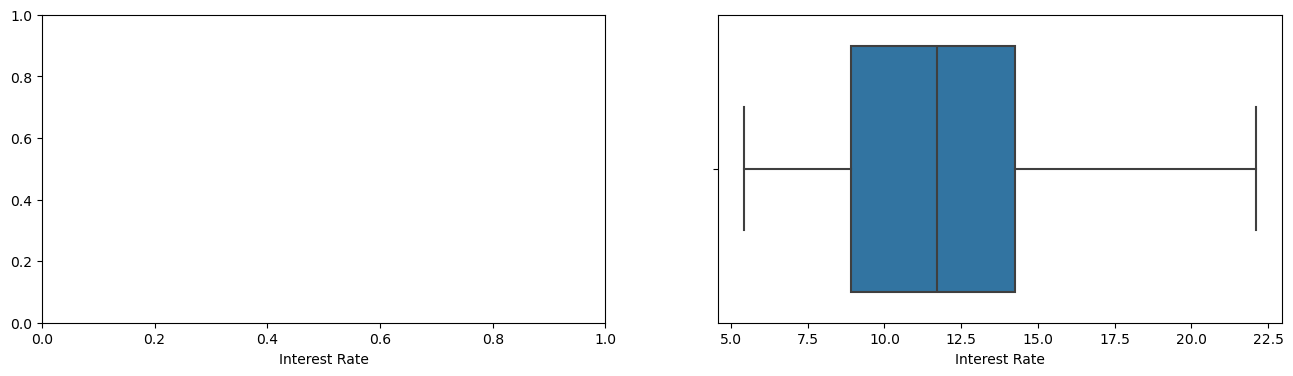

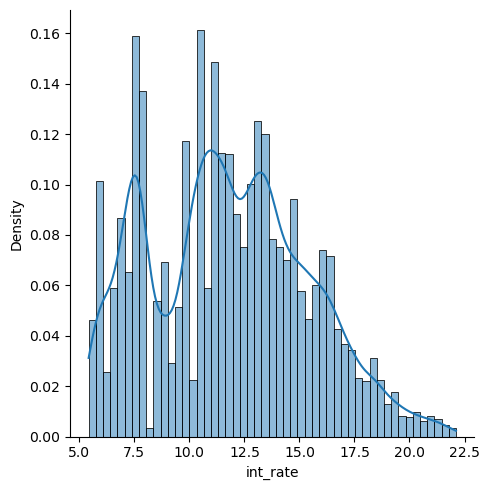

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [79]:
plot_diagram(df,'int_rate')
df['int_rate'].describe()

In [80]:
# Most of the applicatnts int rate is between 8-14 %
# average intrest rate is 11.71 %

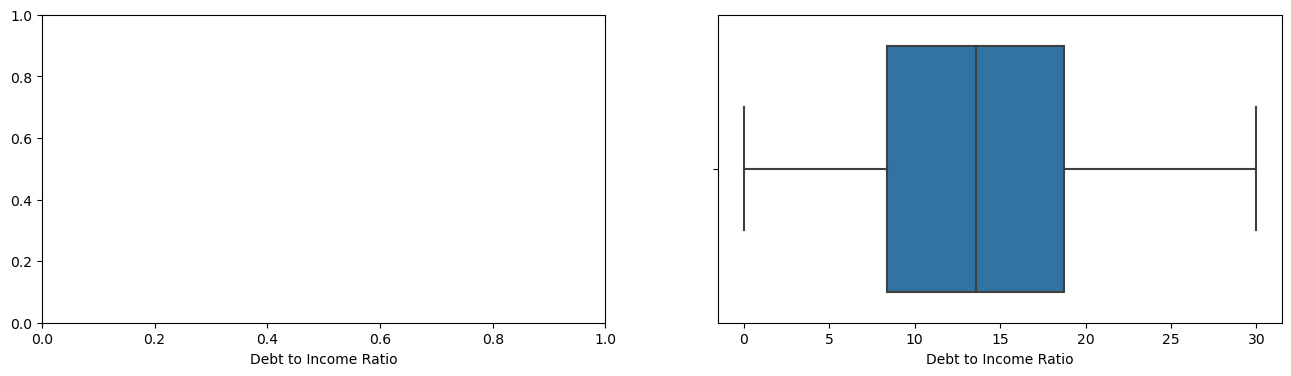

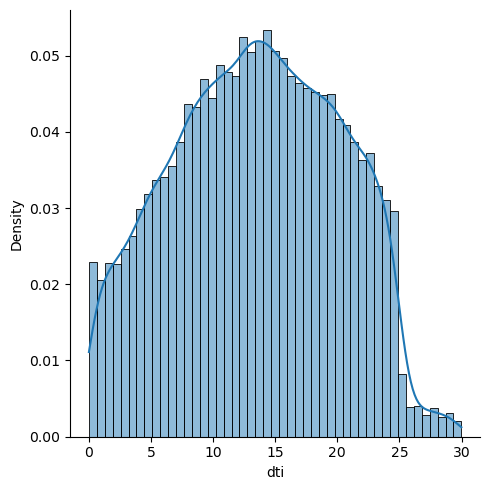

count    33191.000000
mean        13.463454
std          6.651684
min          0.000000
25%          8.360000
50%         13.570000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

In [81]:
plot_diagram(df,'dti')
df['dti'].describe()

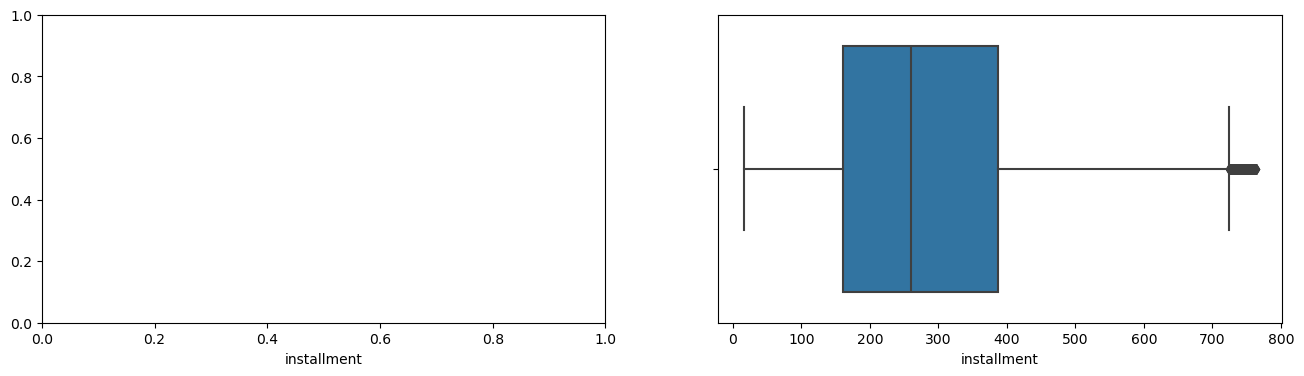

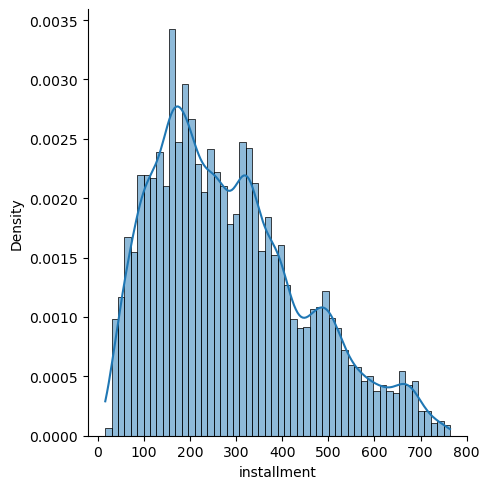

count    33191.000000
mean       286.456292
std        161.010324
min         16.080000
25%        161.130000
50%        260.480000
75%        386.390000
max        763.830000
Name: installment, dtype: float64

In [82]:
plot_diagram(df,'installment')
df['installment'].describe()

## 5.2 Unordered  Categorical  Variable Analysis

<Axes: xlabel='home_ownership'>

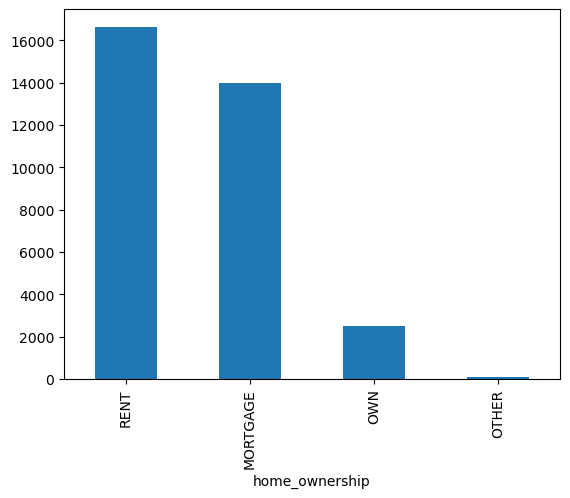

In [83]:
df['home_ownership'].value_counts().plot.bar()

In [84]:
# Maximun no of applicatns are living on Rent or Morgage

<Axes: xlabel='purpose'>

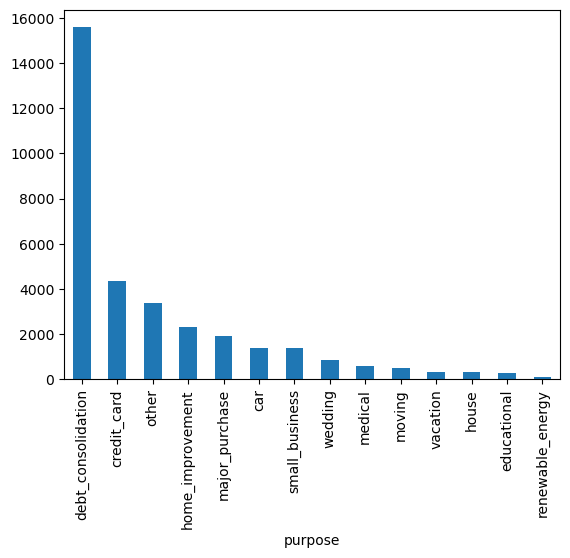

In [85]:
df['purpose'].value_counts().plot.bar()

In [86]:
# most of the applicants are for debt consolidation

In [87]:
df['loan_status'].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

<Axes: ylabel='count'>

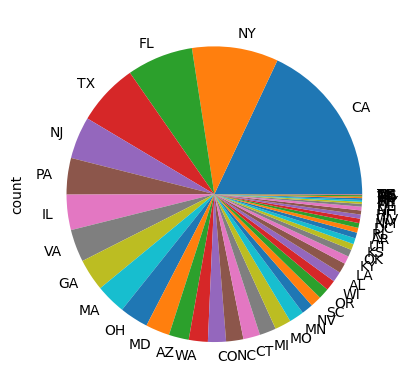

In [88]:
#using pie plot to visualise
df['addr_state'].value_counts().plot(kind="pie")

In [89]:
# most of the applications are form State "CA"

## 5.3 Ordered categorical variable analysis

<Axes: ylabel='count'>

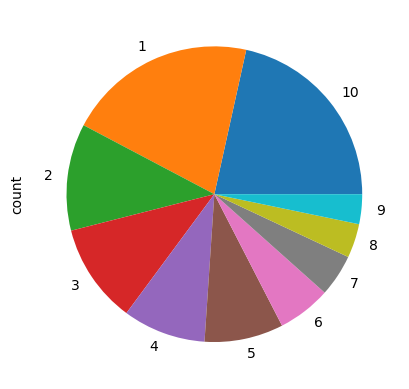

In [90]:
df['emp_length'].value_counts().plot(kind="pie")

In [91]:
#there are more no of 10 years of exp employee

# 6 Bivariate analysis

In [92]:
# Biavariate analysis on annual income against chargedoff propagation
inc_range_vs_loan = df.groupby(['annual_inc_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total']=inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-40K,1570,7326,8896,0.176484
2,50K-60K,788,4435,5223,0.150871
1,40K-50K,807,4593,5400,0.149444
3,60K-70K,486,3261,3747,0.129704
4,70K-80K,385,2749,3134,0.122846
5,80K - above,678,6113,6791,0.099838


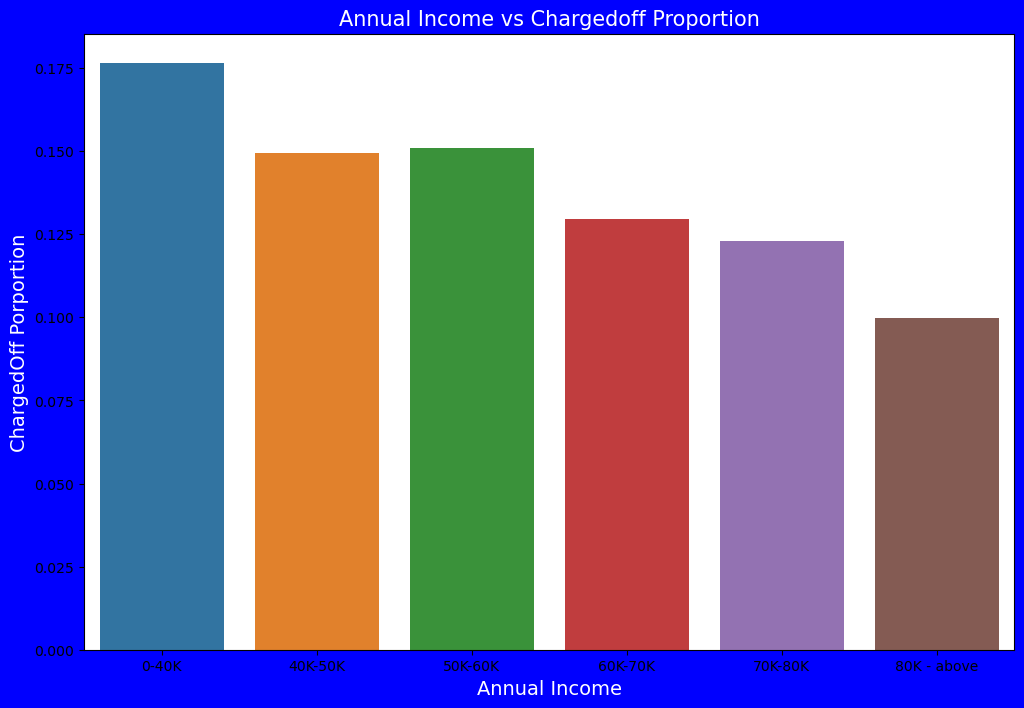

In [93]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Annual Income vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x='annual_inc_b',y='Chargedoff_Proportion',data=inc_range_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

In [94]:
# Observation:-
# Income range 8000+ has less chances  of charged off
# Income range 0-2000 has high  chances of  charged off
# WIth increase of annual income , charged off proportion got decreased. 

In [95]:
# Biavariate analysis on Interest rate against chargedoff propagation
interest_vs_loan = df.groupby(['int_rate_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total']=interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


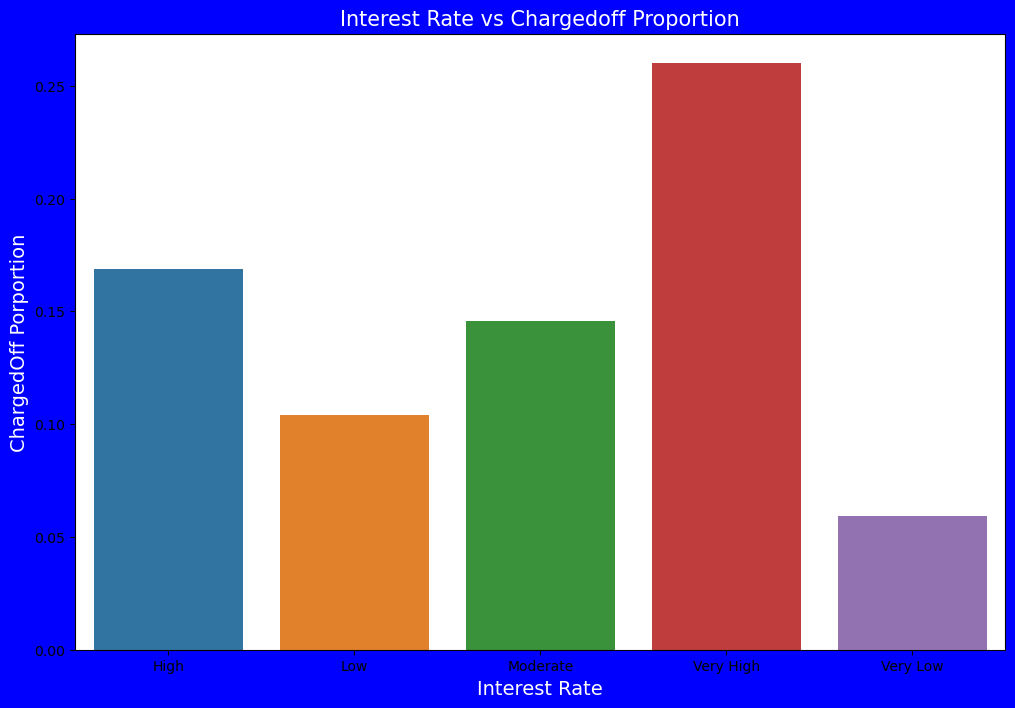

In [96]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Interest Rate vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x=interest_vs_loan['int_rate_b'],y=interest_vs_loan['Chargedoff_Proportion'],data=interest_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
plt.show()

In [97]:
# Biavariate analysis on Home Ownership against chargedoff propagation
home_ownership_vs_loan = df.groupby(['home_ownership','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total']=interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,RENT,2488,14156,6421,0.260084
0,MORTGAGE,1855,12127,5836,0.168780
2,OWN,355,2121,6599,0.145628
1,OTHER,16,73,5562,0.104099


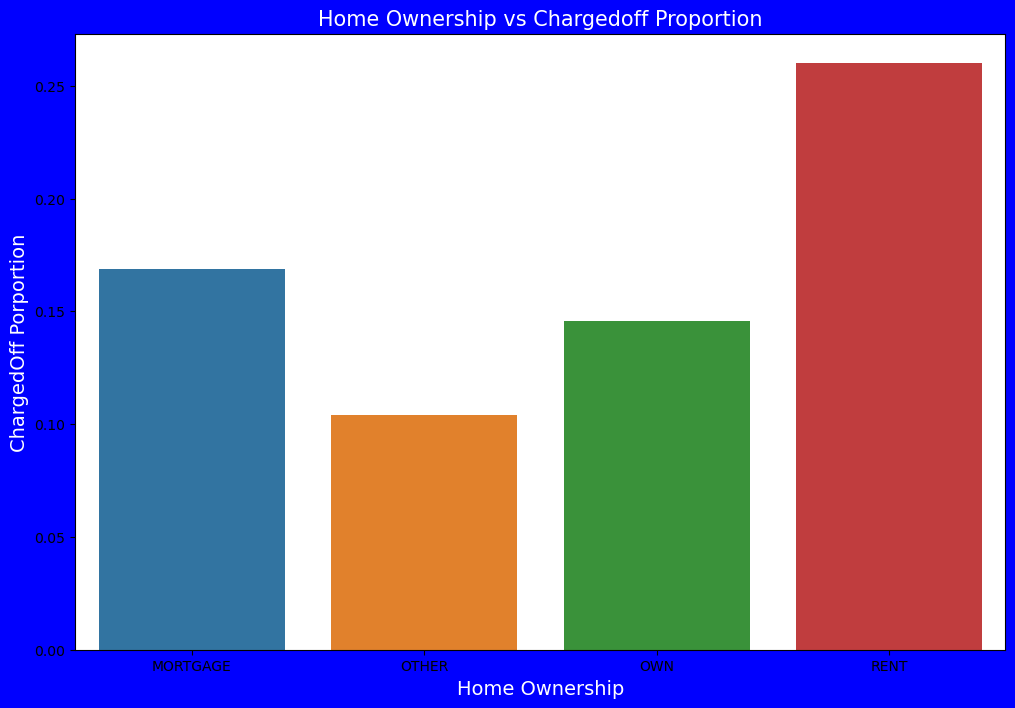

In [98]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Home Ownership vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x=home_ownership_vs_loan['home_ownership'],y=home_ownership_vs_loan['Chargedoff_Proportion'],data=home_ownership_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
plt.show()

In [99]:
# The person not haviong home are high chances of getting defaulted

In [100]:
# Biavariate analysis on Purpose of Loan against chargedoff propagation
purpose_vs_loan = df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


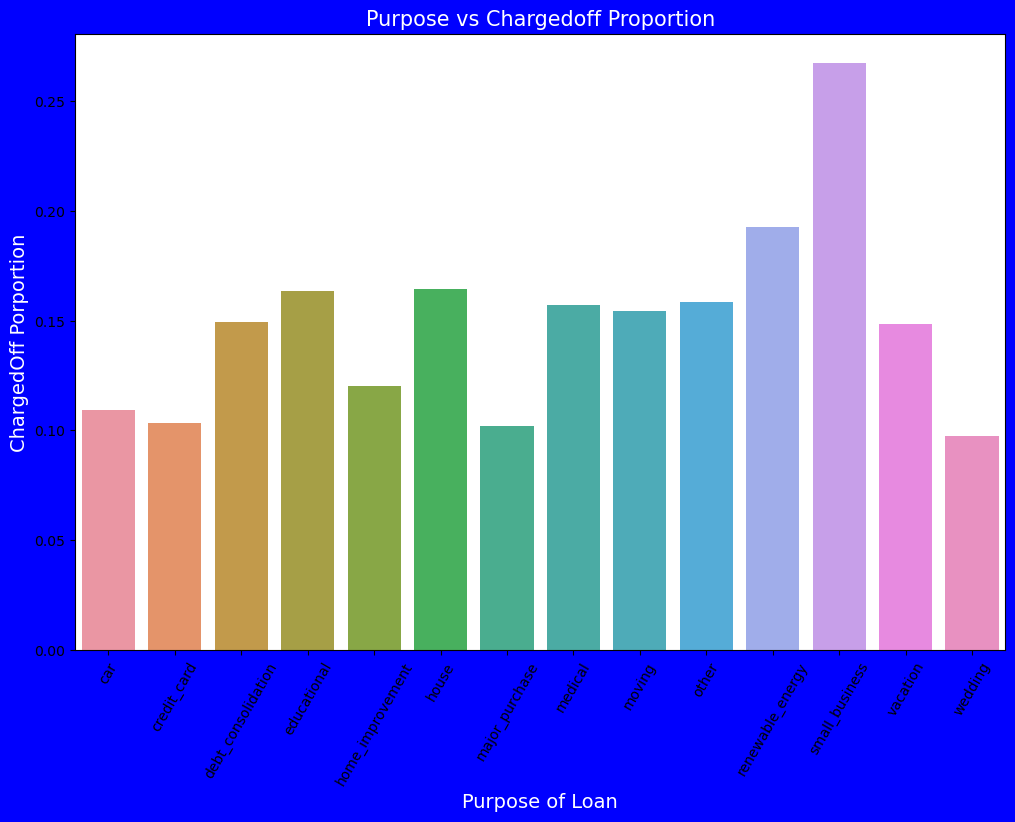

In [101]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Purpose vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x=purpose_vs_loan['purpose'],y=purpose_vs_loan['Chargedoff_Proportion'],data=purpose_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('Purpose of Loan',fontsize=14,color='w')
plt.xticks(rotation=60)
plt.show()

In [102]:
# The person having home loan is having low chances of defaults
# The Person having loan for small business are having high chances of loan defaults

In [103]:
# Biavariate analysis on DTI against chargedoff propagation
dti_vs_loan = df.groupby(['dti_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total']=dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


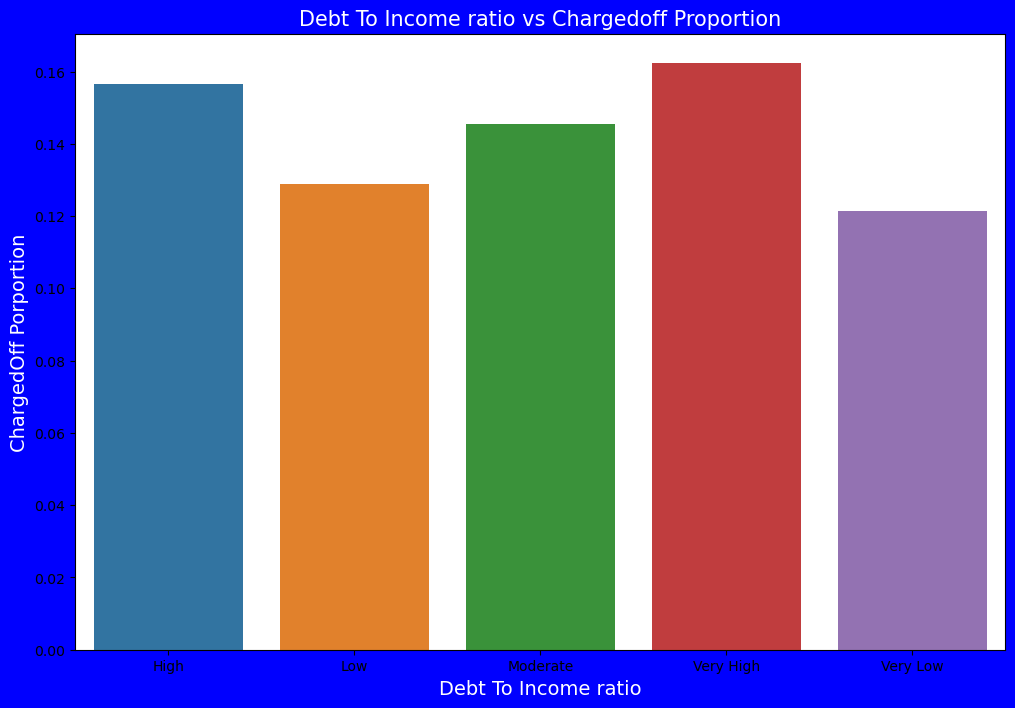

In [104]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Debt To Income ratio vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x=dti_vs_loan['dti_b'],y=dti_vs_loan['Chargedoff_Proportion'],data= dti_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('Debt To Income ratio',fontsize=14,color='w')

plt.show()

In [105]:
# 1 DTI is high, high chances of having defaults
# 2 DTI is low, low chances of

In [106]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

In [107]:
# Biavariate analysis on Bankruptcies against chargedoff propagation
pub_rec_bankruptcies_vs_loan = df.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total']=pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,308,1137,1445,0.213149
0,0.0,4404,27337,31741,0.138748


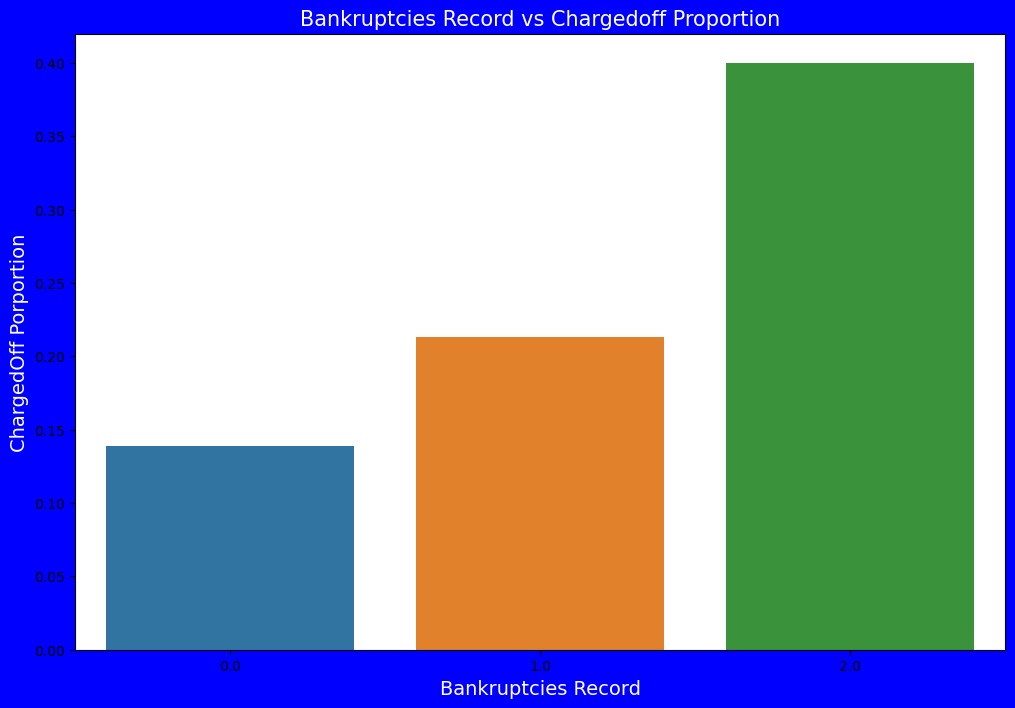

In [108]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Bankruptcies Record vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x=pub_rec_bankruptcies_vs_loan['pub_rec_bankruptcies'],y=pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'],data=pub_rec_bankruptcies_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('Bankruptcies Record',fontsize=14,color='w')

plt.show()

In [109]:
# observation
#Bankruptcies Record  with 2 is having  high impact on loan defaults
#Bankruptcies Record  with 0 is having  low impact on loan defaults
# Lower Bankruptcies lower the risk.

In [110]:
# Biavariate analysis on Issues of the year against chargedoff propagation
issue_year_vs_loan = df.groupby(['issue_year','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total']=issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,2,5,7,0.285714
4,2011,2705,14788,17493,0.154633
1,2008,158,880,1038,0.152216
3,2010,1312,9012,10324,0.127083
2,2009,537,3792,4329,0.124047


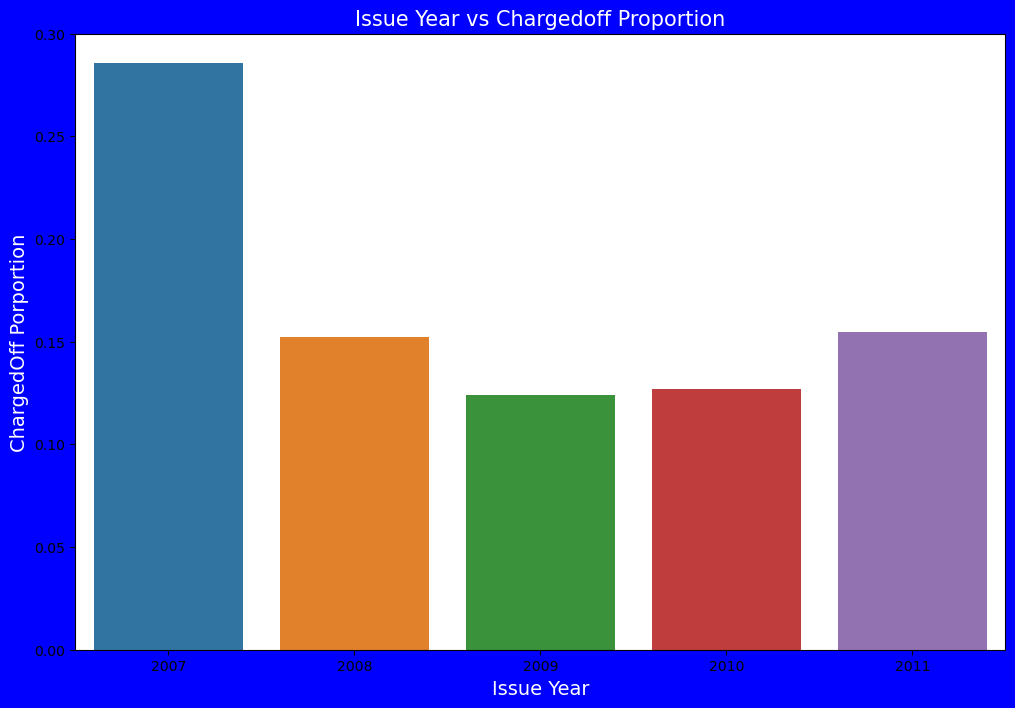

In [111]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Issue Year vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x=issue_year_vs_loan['issue_year'],y=issue_year_vs_loan['Chargedoff_Proportion'],data=issue_year_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('Issue Year',fontsize=14,color='w')

plt.show()

In [112]:
# Issue year  2007 is high loan defaults
# 2009 is have lowest loan defaults

In [113]:
# Biavariate analysis on Month of Issue against chargedoff propagation
issue_month_vs_loan = df.groupby(['issue_month','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total']=issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
8,9,477,2531,3008,0.158577
11,12,567,3034,3601,0.157456
4,5,401,2188,2589,0.154886
9,10,462,2693,3155,0.146434
5,6,410,2390,2800,0.146429
10,11,494,2976,3470,0.142363
6,7,415,2534,2949,0.140726
7,8,405,2562,2967,0.136502
0,1,260,1724,1984,0.131048
3,4,317,2176,2493,0.127156


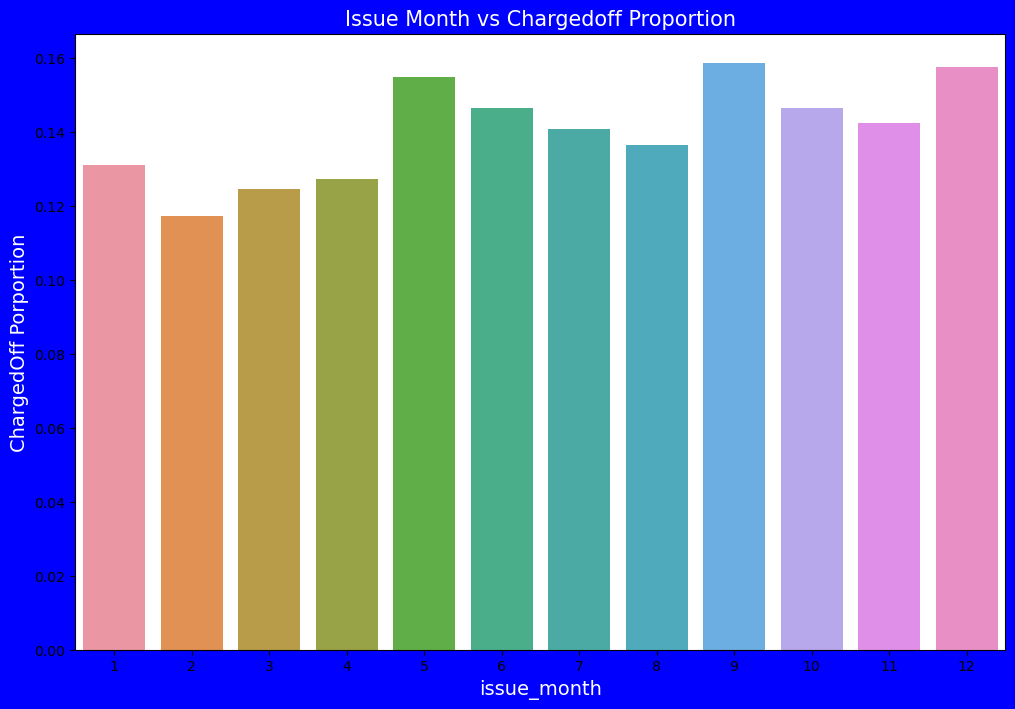

In [114]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Issue Month vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x=issue_month_vs_loan['issue_month'],y=issue_month_vs_loan['Chargedoff_Proportion'],data=issue_month_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('issue_month',fontsize=14,color='w')

plt.show()

In [115]:
# 1 Loan issued in the month of May, September & December is having high no of loan defaults
# 2 Majority of loan defaults are comming from the month of september to December.

In [116]:
# Biavariate analysis on Address State against chargedoff propagation
addr_state_vs_loan = df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total']=addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
40,TN,2.0,7.0,9.0,0.222222
31,NV,87.0,328.0,415.0,0.209639
11,HI,28.0,119.0,147.0,0.190476
0,AK,12.0,51.0,63.0,0.190476
39,SD,11.0,48.0,59.0,0.186441
30,NM,28.0,133.0,161.0,0.173913
9,FL,414.0,1990.0,2404.0,0.172213
23,MO,99.0,492.0,591.0,0.167513
35,OR,63.0,328.0,391.0,0.161125
10,GA,184.0,981.0,1165.0,0.157940


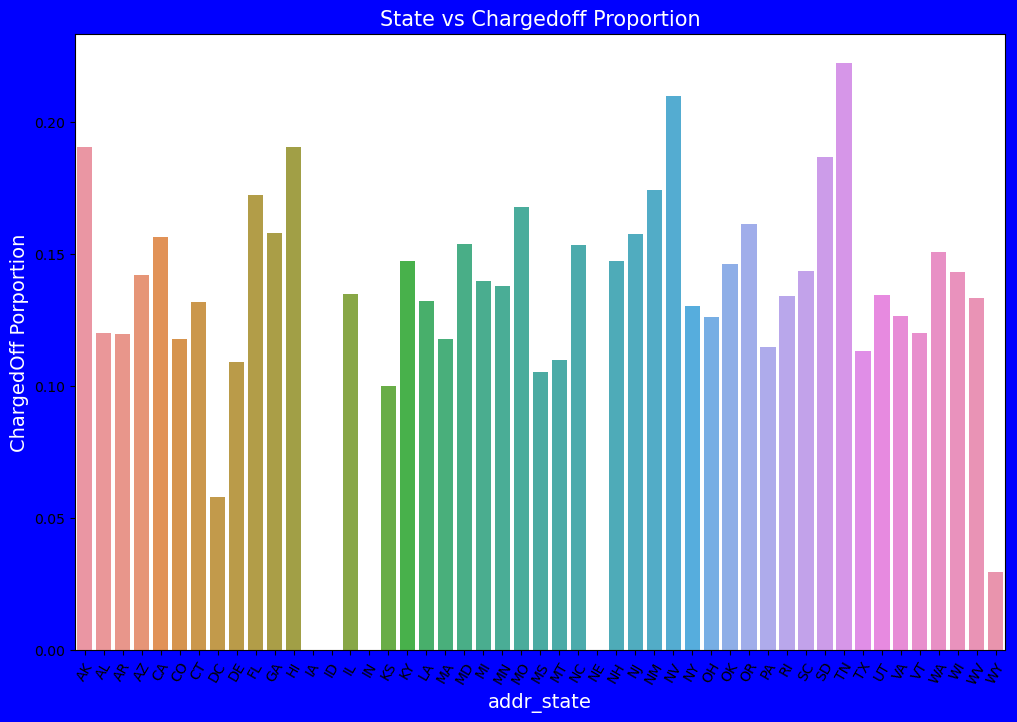

In [117]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("State vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x='addr_state',y='Chargedoff_Proportion',data=addr_state_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('addr_state',fontsize=14,color='w')
plt.xticks(rotation=60)
plt.show()

In [118]:
# Biavariate analysis on Grade against chargedoff propagation
grade_vs_loan = df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,55,104,159,0.345912
5,F,220,480,700,0.314286
4,E,557,1518,2075,0.268434
3,D,941,3329,4270,0.220375
2,C,1177,5702,6879,0.171100
1,B,1225,8857,10082,0.121504
0,A,539,8487,9026,0.059716


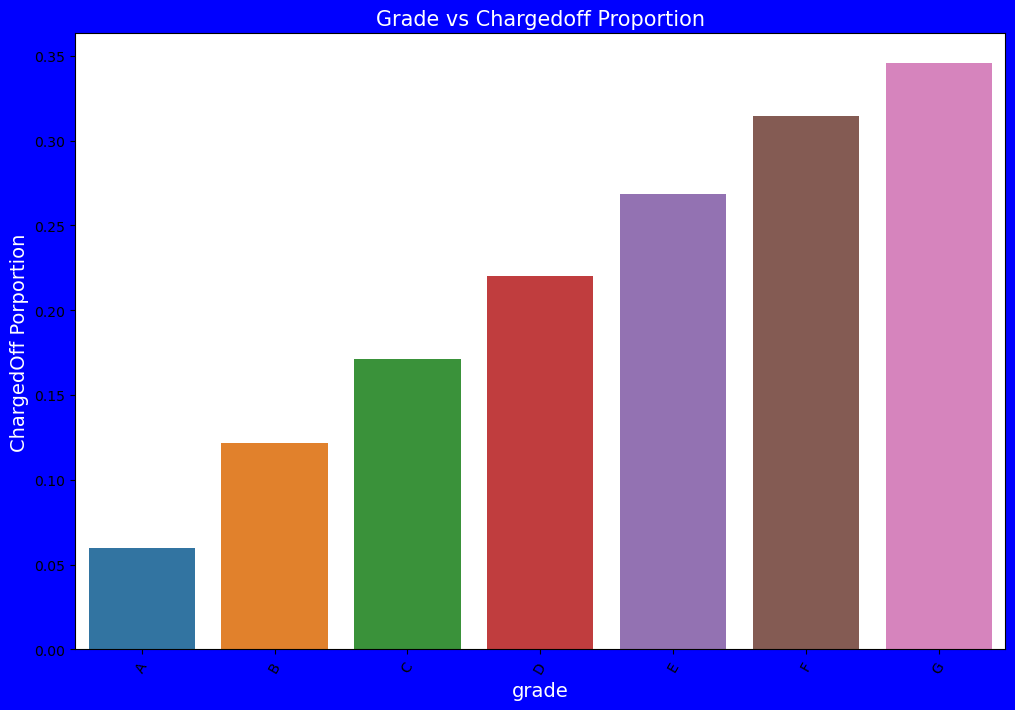

In [119]:
# draw the bar plots on above data
fig,ax1 = plt.subplots(figsize=(12,8),facecolor='b')
ax1.set_title("Grade vs Chargedoff Proportion", fontsize=15,color='w')
ax1=sns.barplot(x='grade',y='Chargedoff_Proportion',data=grade_vs_loan)
ax1.set_ylabel('ChargedOff Porportion', fontsize=14,color='w')
ax1.set_xlabel('grade',fontsize=14,color='w')
plt.xticks(rotation=60)
plt.show()

In [120]:
# Grade G is having high loan defaults
# Grade A is having lowest loan defaults

# 7 Corelation Analysis

In [121]:
df.dtypes

id                               int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
loan_amnt_b                     object
annual_inc_b                    object
int_rate_b                      object
dti_b                    

In [122]:
loan_df = df.drop(['grade', 'emp_length','home_ownership','verification_status','loan_status','purpose','zip_code','addr_state','loan_amnt_b','annual_inc_b','int_rate_b','dti_b'], axis=1)

In [123]:
loan_df = loan_df.drop(['issue_d'], axis=1)

In [124]:
loan_df = loan_df.drop(['id','funded_amnt_inv','annual_inc','dti','total_acc','issue_year','issue_month'], axis=1)

In [125]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33191 entries, 0 to 39680
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             33191 non-null  float64
 1   funded_amnt           33191 non-null  float64
 2   term                  33191 non-null  int64  
 3   int_rate              33191 non-null  float64
 4   installment           33191 non-null  float64
 5   pub_rec_bankruptcies  33191 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


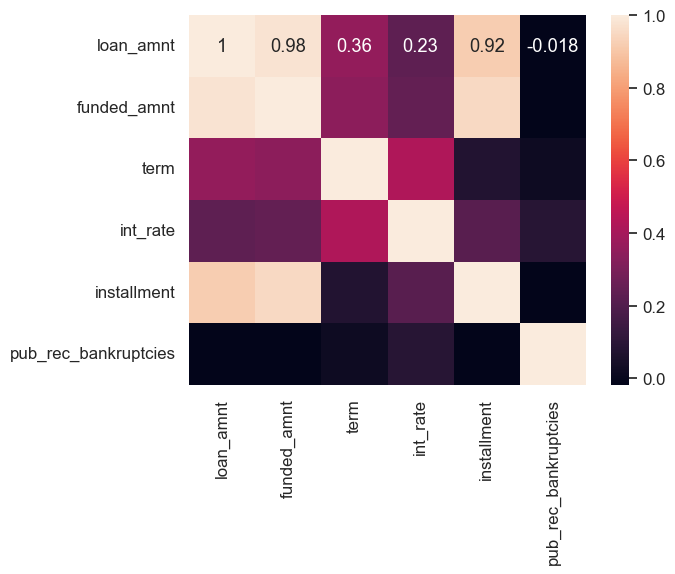

In [126]:

corr_loan=loan_df
corr=corr_loan.corr()
sns.set(font_scale=1.1)
sns.heatmap(corr, annot= True, )
plt.show()

In [127]:
# Negative Correlation
#1. loan_amnt has negative correlation with pub_rec_bankruptcies

# Strong correlation
#term and loan amount are in strong co relation
#term and intrest rate are in strong co relation


<Axes: xlabel='term', ylabel='loan_amnt'>

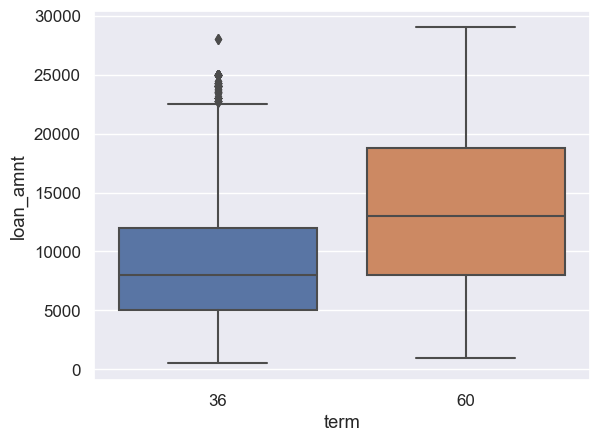

In [128]:
sns.boxplot(x='term',y='loan_amnt',data=corr_loan)

In [129]:
# As per the above graph with in increase of term loan amount increases

<Axes: xlabel='term', ylabel='int_rate'>

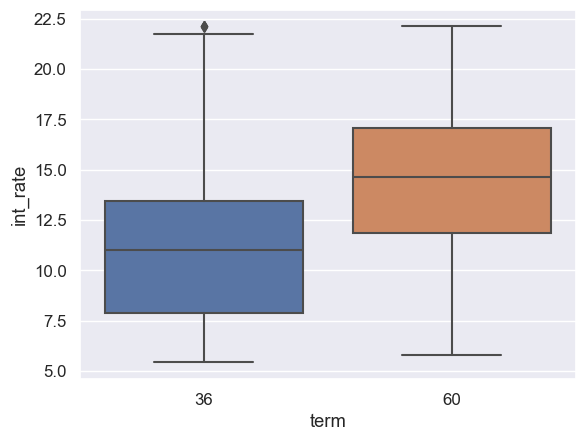

In [130]:
sns.boxplot(x='term',y='int_rate',data=corr_loan)

In [131]:
# As per the above graph with in increase of term loan intrest rate increases